In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings as wr
wr.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/Users/sheidamajidi/Desktop/Summer2024/MGSC670/G-HW2/energy_dataset.csv')
data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                

In [6]:
# date time conversion clean up
data.time = pd.to_datetime(data.time, utc = True, infer_datetime_format= True)

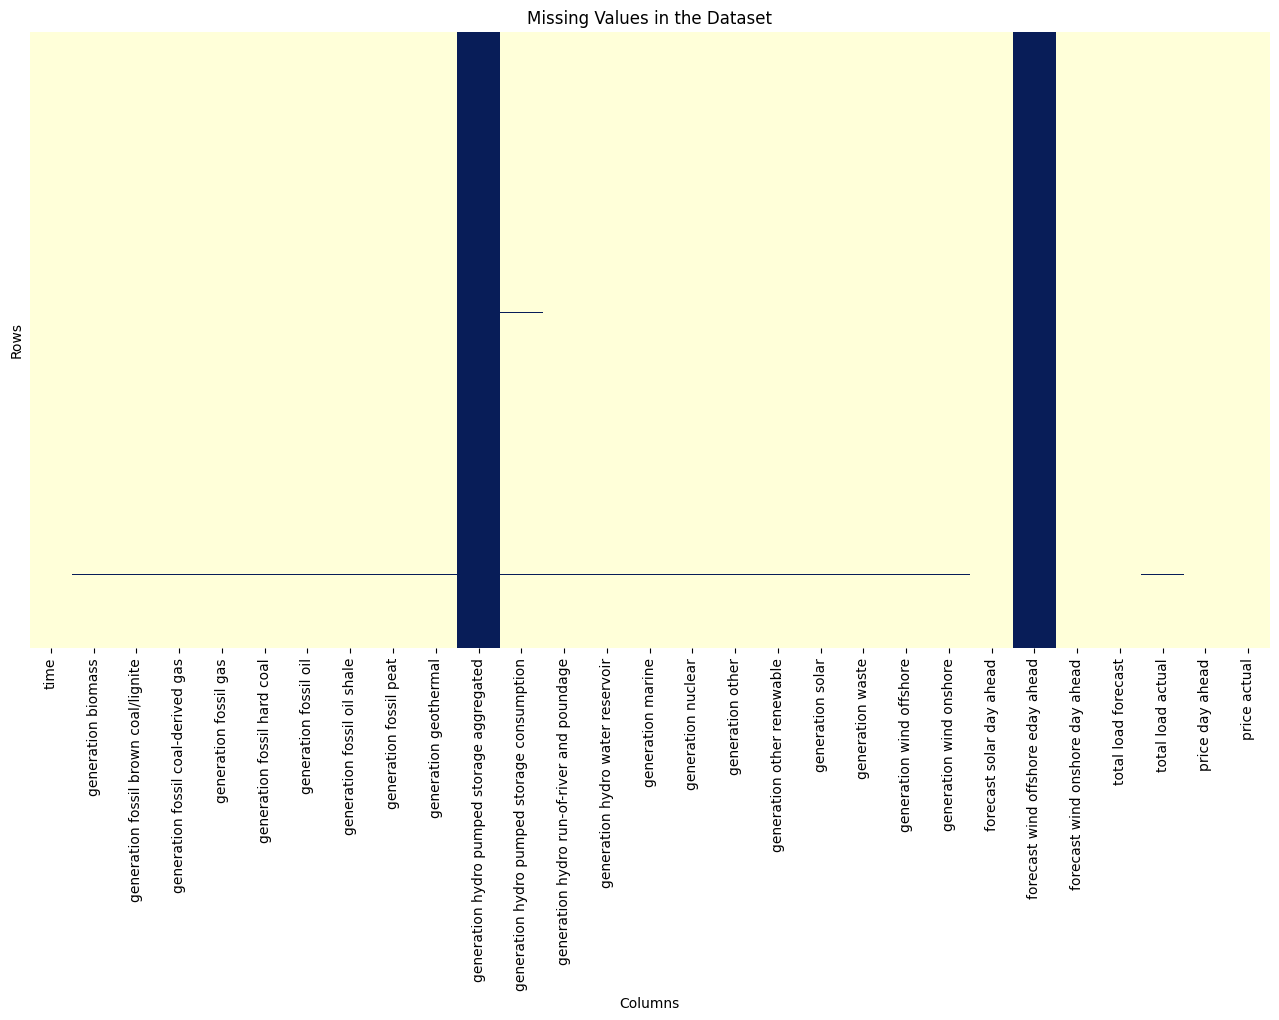

In [7]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title('Missing Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

- as the values in 2 columns "generation hydro pumped storage aggregated" and "ferecast wind offshore eday ahead" are almost all missing, we drop columns with missing data more than 90%.

In [8]:
# drop columns with missing values more than 90%
data = data.dropna(thresh=0.9*len(data), axis=1)
data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89



Correlation Matrix:
                                             generation biomass  \
generation biomass                                     1.000000   
generation fossil brown coal/lignite                   0.229809   
generation fossil coal-derived gas                          NaN   
generation fossil gas                                 -0.021660   
generation fossil hard coal                            0.433522   
generation fossil oil                                  0.459530   
generation fossil oil shale                                 NaN   
generation fossil peat                                      NaN   
generation geothermal                                       NaN   
generation hydro pumped storage consumption           -0.044898   
generation hydro run-of-river and poundage            -0.284877   
generation hydro water reservoir                      -0.033675   
generation marine                                           NaN   
generation nuclear                       

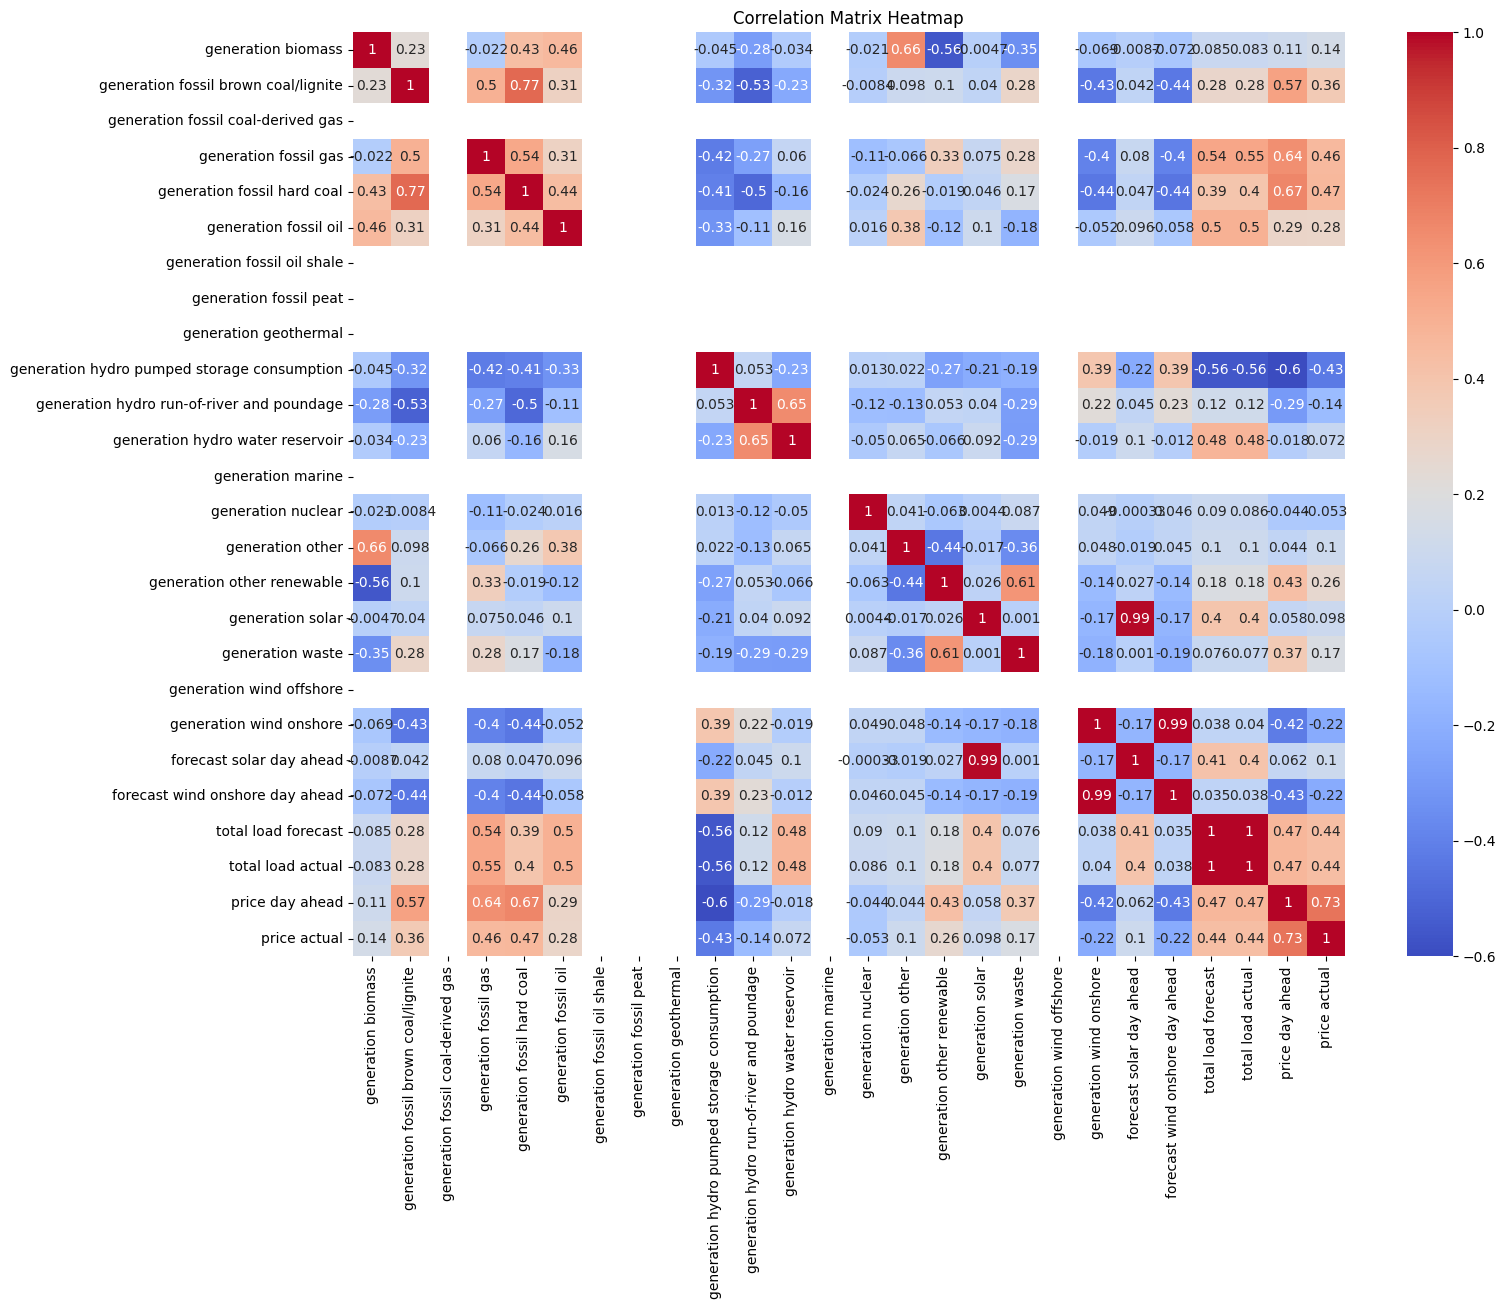

In [9]:
# Correlation matrix (excluding non-numerical columns)
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Univariate analysis: total supply

In [10]:
# total supply calculation

generation_columns = [
    'generation biomass', 
    'generation fossil brown coal/lignite',
    'generation fossil coal-derived gas', 
    'generation fossil gas',
    'generation fossil hard coal', 
    'generation fossil oil',
    'generation fossil oil shale', 
    'generation fossil peat',
    'generation geothermal', 
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 
    'generation hydro water reservoir',
    'generation marine', 
    'generation nuclear', 
    'generation other',
    'generation other renewable', 
    'generation solar', 
    'generation waste',
    'generation wind offshore', 
    'generation wind onshore'
]

data['total supply'] = data[generation_columns].sum(axis=1)


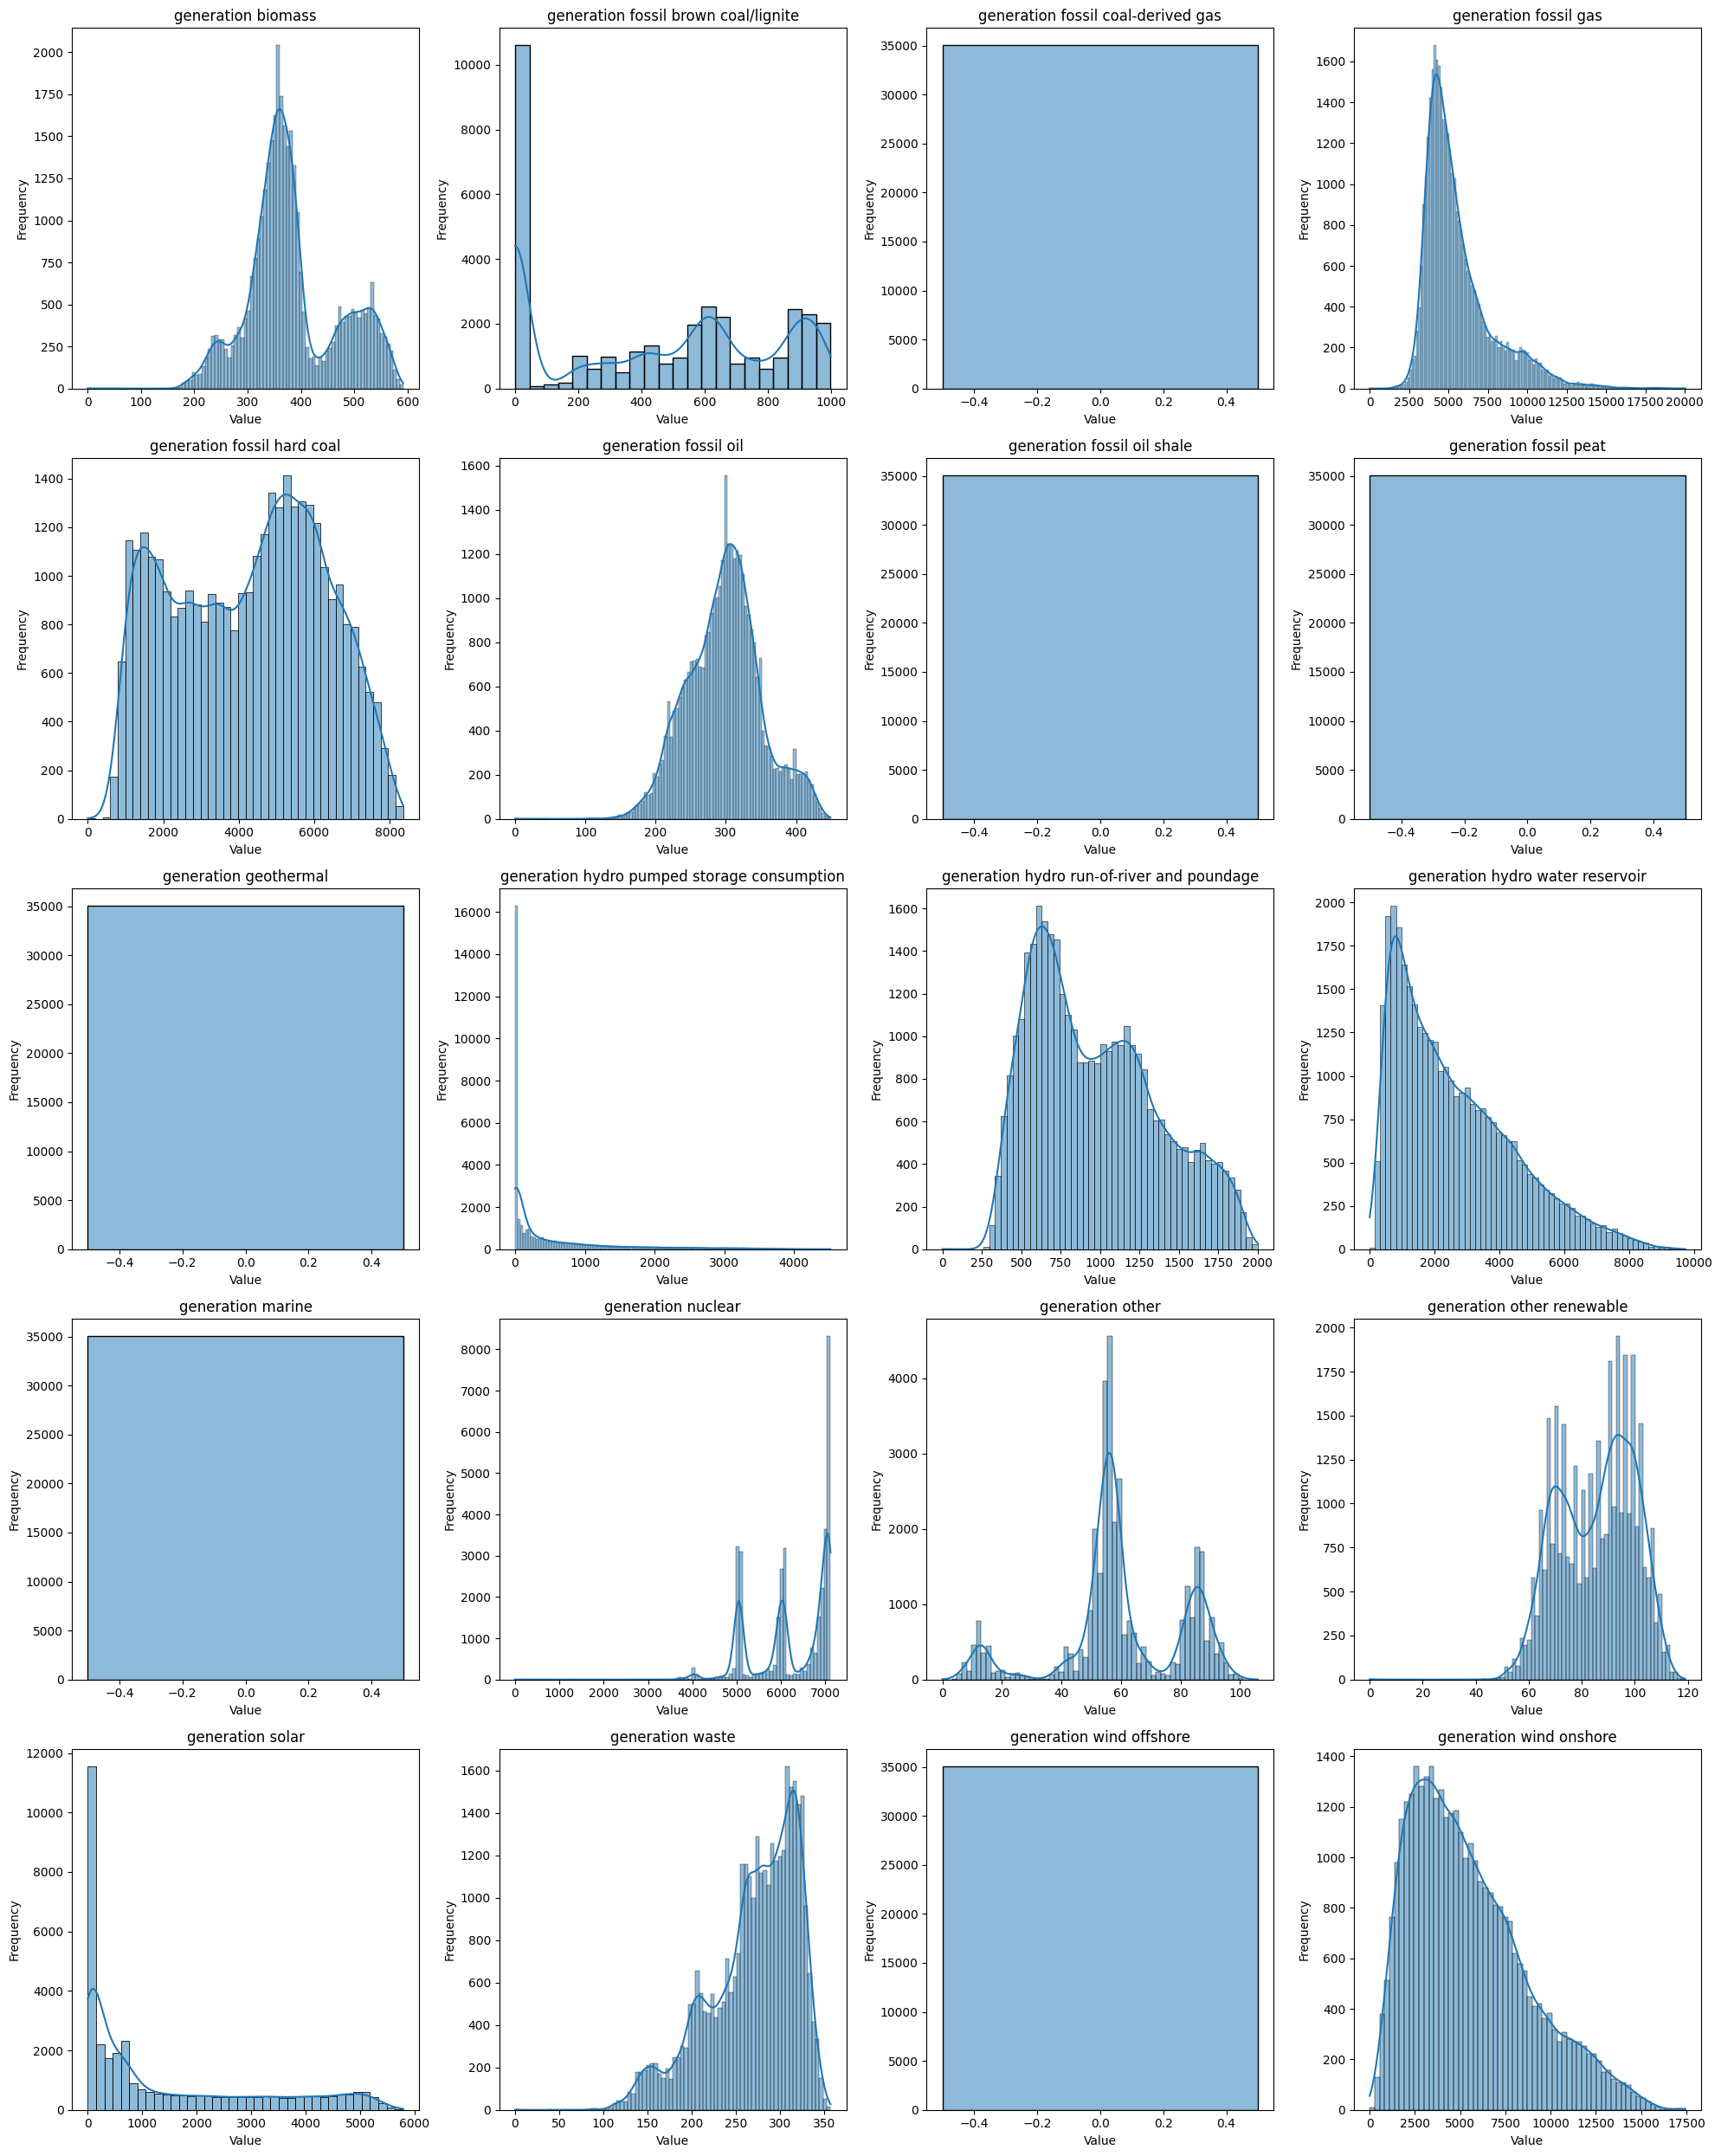

In [11]:
# univariate analysis for each column
num_cols = 4 
num_rows = (len(generation_columns) + num_cols - 1) // num_cols 

plt.figure(figsize=(20, num_rows * 5))
for idx, col in enumerate(generation_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

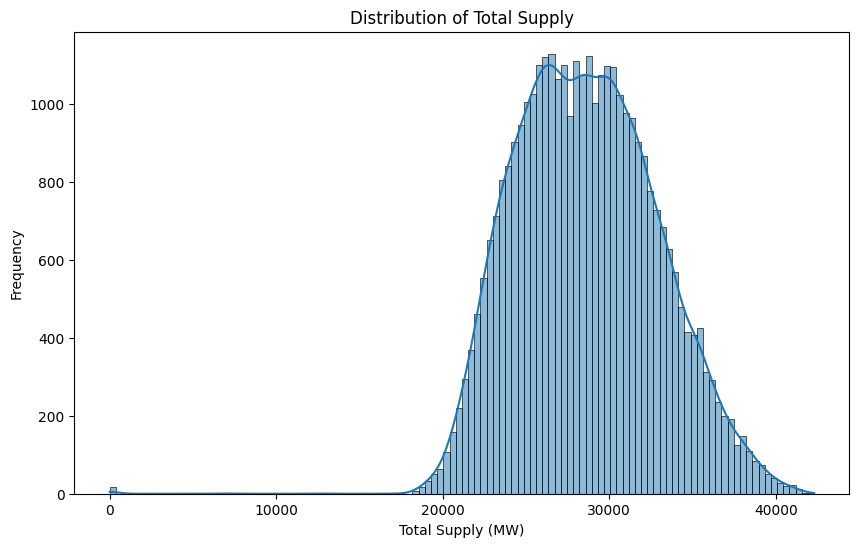

In [12]:
# Distribution of total supply
plt.figure(figsize=(10, 6))
sns.histplot(data['total supply'].dropna(), kde=True)
plt.title('Distribution of Total Supply')
plt.xlabel('Total Supply (MW)')
plt.ylabel('Frequency')
plt.show()

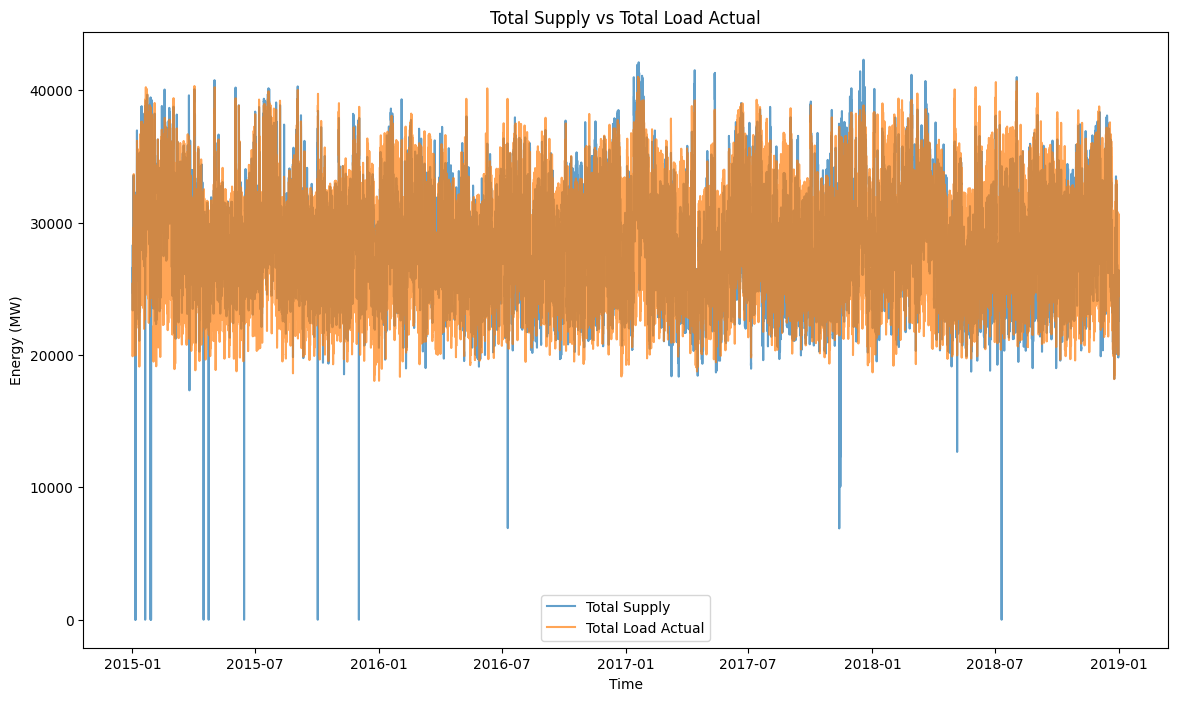

In [13]:
# total supply vs total load actual
plt.figure(figsize=(14, 8))
plt.plot(data['time'], data['total supply'], label='Total Supply', alpha=0.7)
plt.plot(data['time'], data['total load actual'], label='Total Load Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Energy (MW)')
plt.title('Total Supply vs Total Load Actual')
plt.legend()
plt.show()

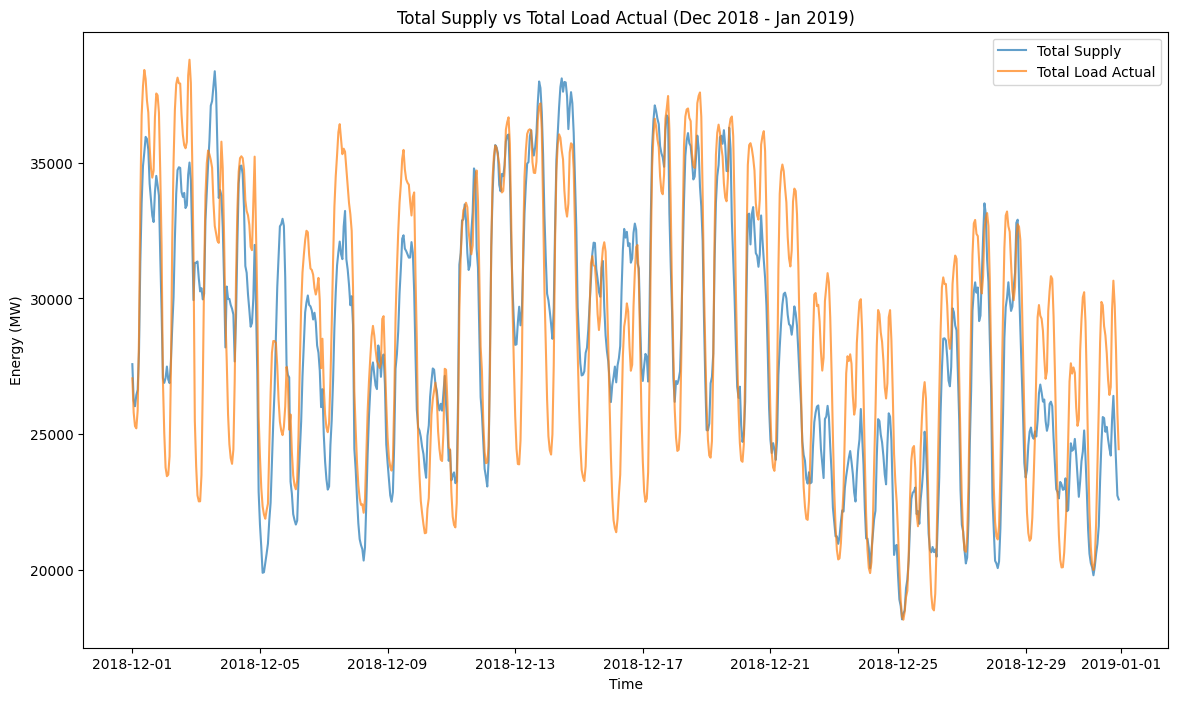

In [14]:
start_date = '2018-12-01'
end_date = '2019-01-01'
zoomed_data = data[(data['time'] >= start_date) & (data['time'] < end_date)]

# Total supply vs total load actual for the specific time range (recent data)
plt.figure(figsize=(14, 8))
plt.plot(zoomed_data['time'], zoomed_data['total supply'], label='Total Supply', alpha=0.7)
plt.plot(zoomed_data['time'], zoomed_data['total load actual'], label='Total Load Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Energy (MW)')
plt.title('Total Supply vs Total Load Actual (Dec 2018 - Jan 2019)')
plt.legend()
plt.show()


### Bivariate analysis

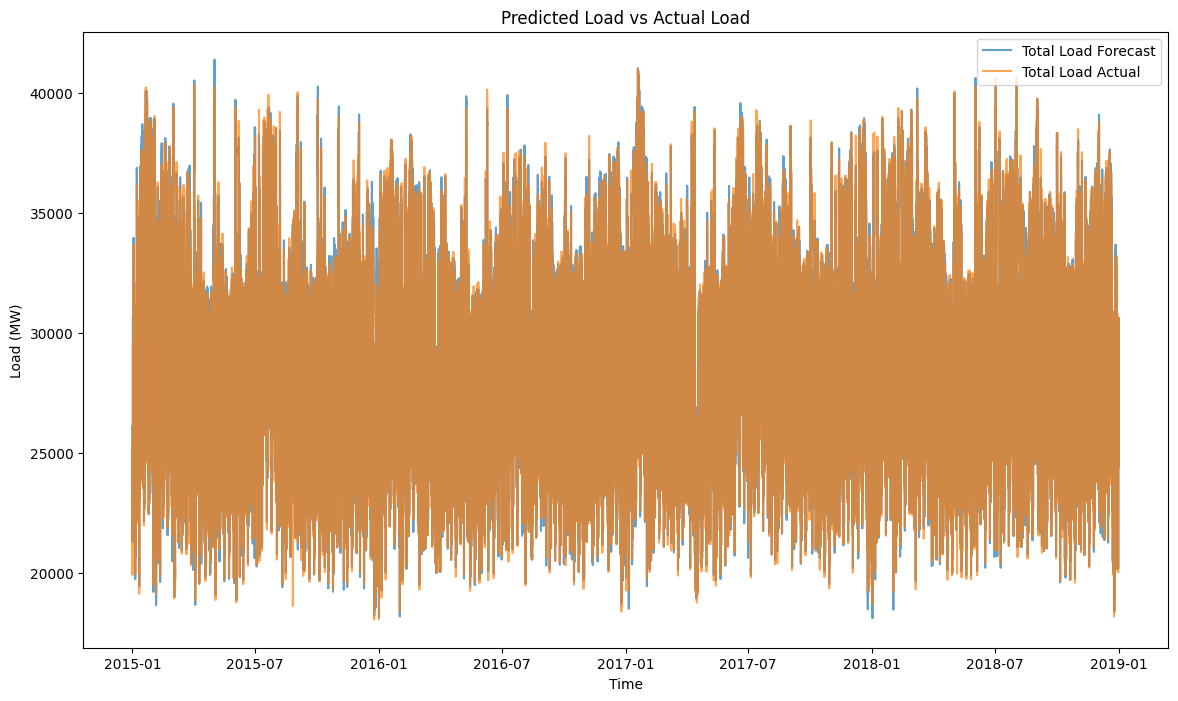

In [15]:
# Bivariate analysis: predicted load vs actual load
plt.figure(figsize=(14, 8))
plt.plot(data['time'], data['total load forecast'], label='Total Load Forecast', alpha=0.7)
plt.plot(data['time'], data['total load actual'], label='Total Load Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.title('Predicted Load vs Actual Load')
plt.legend()
plt.show()

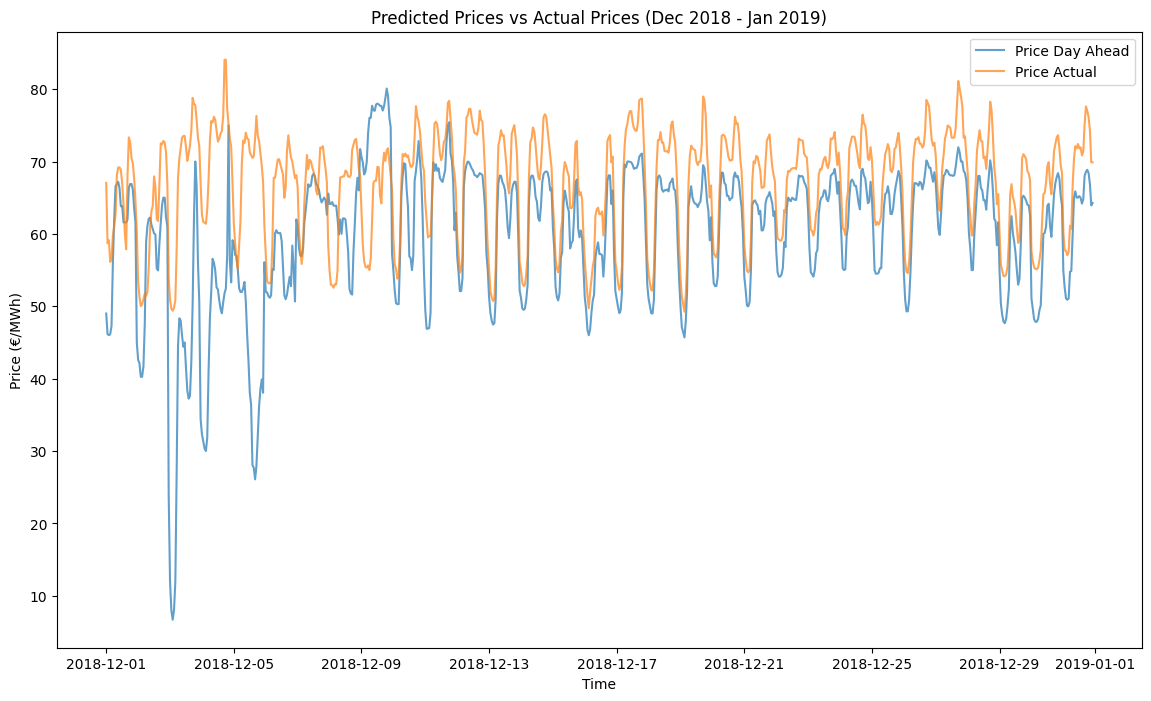

In [16]:
start_date = '2018-12-01'
end_date = '2019-01-01'
zoomed_data = data[(data['time'] >= start_date) & (data['time'] < end_date)]

plt.figure(figsize=(14, 8))
plt.plot(zoomed_data['time'], zoomed_data['price day ahead'], label='Price Day Ahead', alpha=0.7)
plt.plot(zoomed_data['time'], zoomed_data['price actual'], label='Price Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Price (€/MWh)')
plt.title('Predicted Prices vs Actual Prices (Dec 2018 - Jan 2019)')
plt.legend()
plt.show()

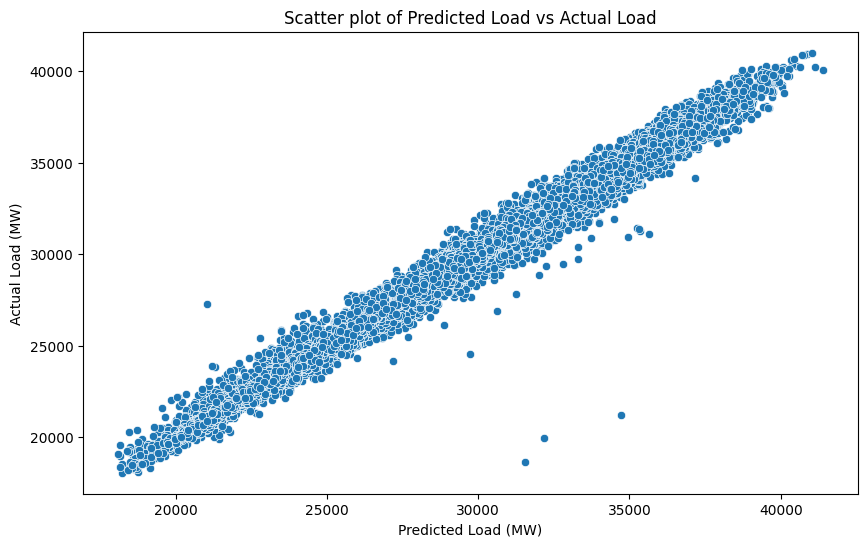

In [17]:
# predicted load vs actual load
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['total load forecast'], y=data['total load actual'])
plt.title('Scatter plot of Predicted Load vs Actual Load')
plt.xlabel('Predicted Load (MW)')
plt.ylabel('Actual Load (MW)')
plt.show()

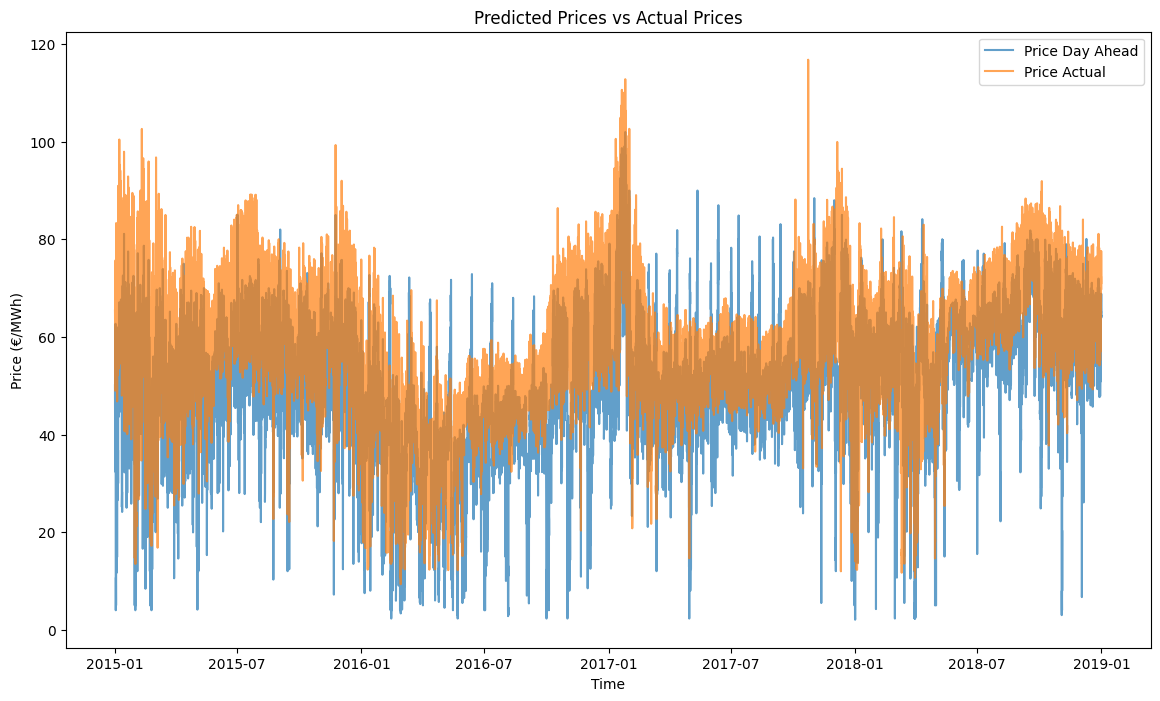

In [18]:
# bivariate analysis: predicted prices vs actual prices
plt.figure(figsize=(14, 8))
plt.plot(data['time'], data['price day ahead'], label='Price Day Ahead', alpha=0.7)
plt.plot(data['time'], data['price actual'], label='Price Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Price (€/MWh)')
plt.title('Predicted Prices vs Actual Prices')
plt.legend()
plt.show()

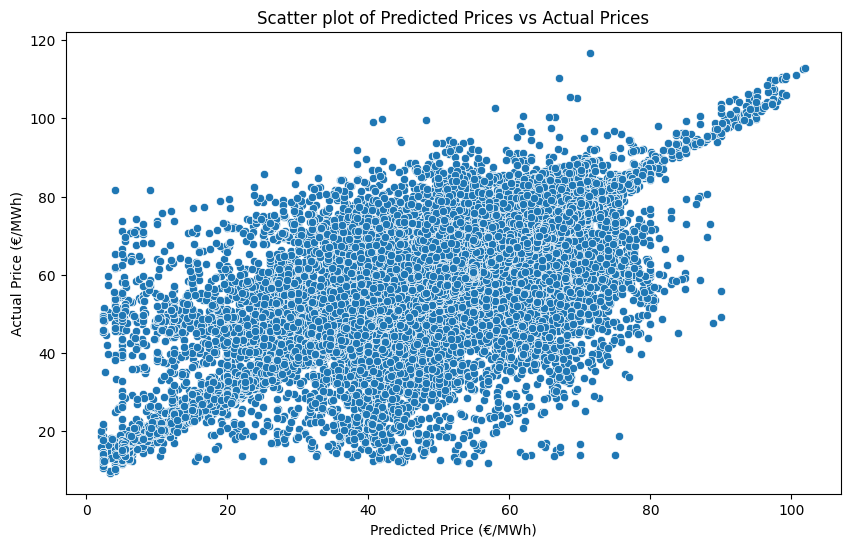

In [19]:
# bivariate analysis: predicted prices vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price day ahead'], y=data['price actual'])
plt.title('Scatter plot of Predicted Prices vs Actual Prices')
plt.xlabel('Predicted Price (€/MWh)')
plt.ylabel('Actual Price (€/MWh)')
plt.show()

In [20]:
# correlation matrix of total and actual load, forecast, and prices
correlation_matrix = data[['total supply', 'total load actual', 'total load forecast', 'price day ahead', 'price actual']].corr()
print("\nCorrelation Matrix of Selected Features:")
correlation_matrix


Correlation Matrix of Selected Features:


,total supply,total load actual,total load forecast,price day ahead,price actual
total supply,1.000000,0.826598,0.814945,0.246987,0.291052
total load actual,0.826598,1.000000,0.995139,0.473869,0.436127
total load forecast,0.814945,0.995139,1.000000,0.474649,0.435864
price day ahead,0.246987,0.473869,0.474649,1.000000,0.732155
price actual,0.291052,0.436127,0.435864,0.732155,1.000000


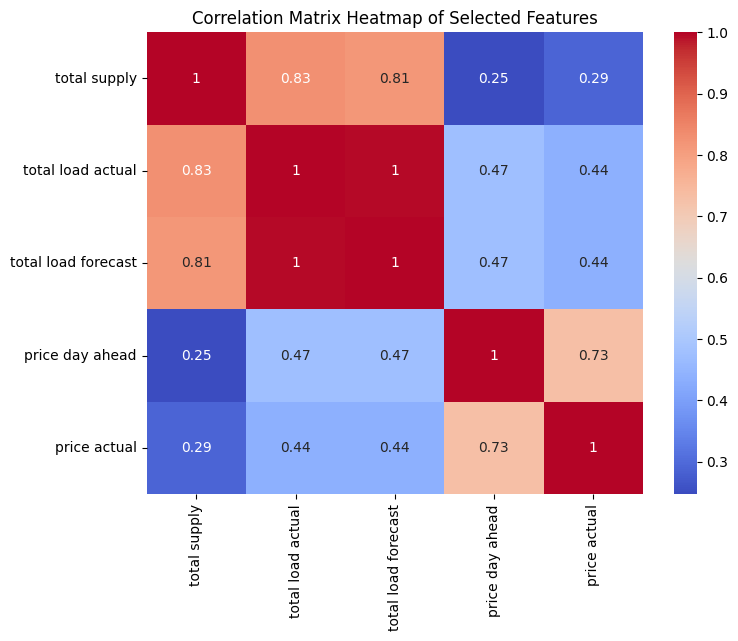

In [21]:
# heatmap of the correlation matrix for the selected features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap of Selected Features')
plt.show()

### Actual load and actual price

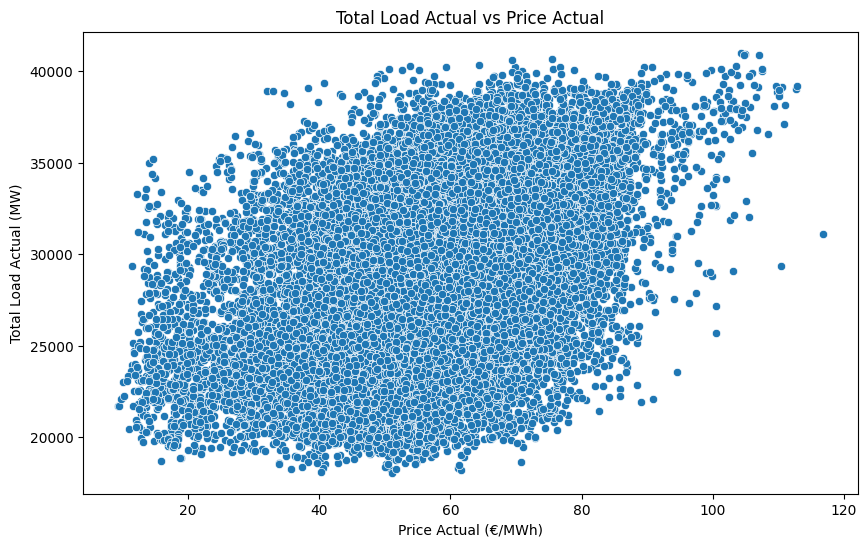

In [22]:
# total load actual vs price actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price actual'], y=data['total load actual'])
plt.title('Total Load Actual vs Price Actual')
plt.xlabel('Price Actual (€/MWh)')
plt.ylabel('Total Load Actual (MW)')
plt.show()

In [24]:
X = data['price actual']
Y = data['total load actual']
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total load actual   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 05 Jun 2024   Prob (F-statistic):                nan
Time:                        21:44:25   Log-Likelihood:                    nan
No. Observations:               35064   AIC:                               nan
Df Residuals:                   35062   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const               nan        nan        nan        nan         nan         nan
price actual        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

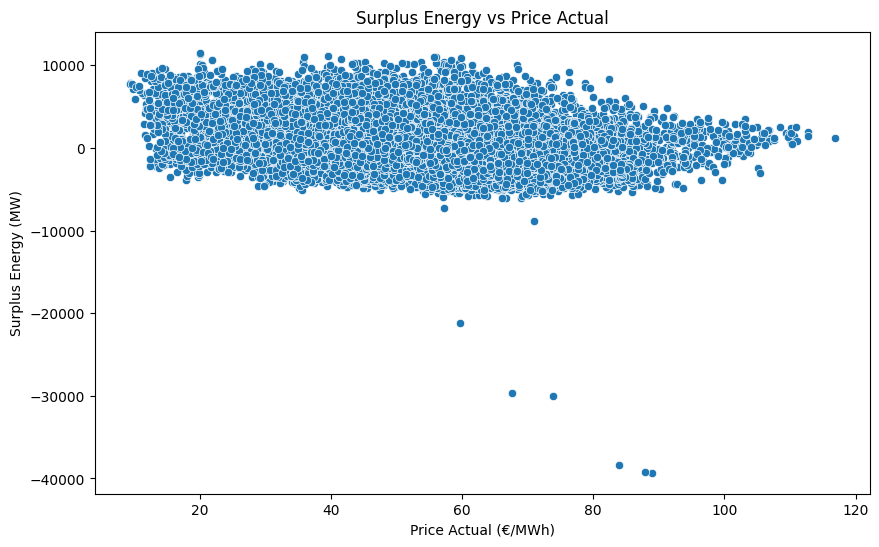

In [25]:
# Calculate surplus energy (Total Supply - Total Load Actual)
data['surplus energy'] = data['total supply'] - data['total load actual']

# Scatter plot of Surplus Energy vs Price Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price actual'], y=data['surplus energy'])
plt.title('Surplus Energy vs Price Actual')
plt.xlabel('Price Actual (€/MWh)')
plt.ylabel('Surplus Energy (MW)')
plt.show()

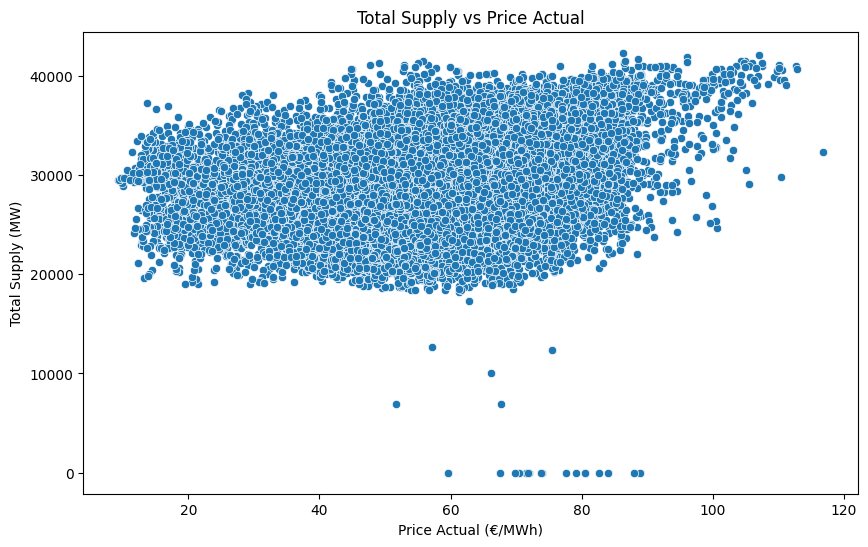

In [26]:
# Scatter plot of Total Supply vs Price Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['price actual'], y=data['total supply'])
plt.title('Total Supply vs Price Actual')
plt.xlabel('Price Actual (€/MWh)')
plt.ylabel('Total Supply (MW)')
plt.show()

### Price variation based on time of the day 

In [27]:
# extract the hour from the datetime
data['hour'] = data['time'].dt.hour

# average price for each hour of the day
hourly_price_avg = data.groupby('hour')['price actual'].mean().reset_index()

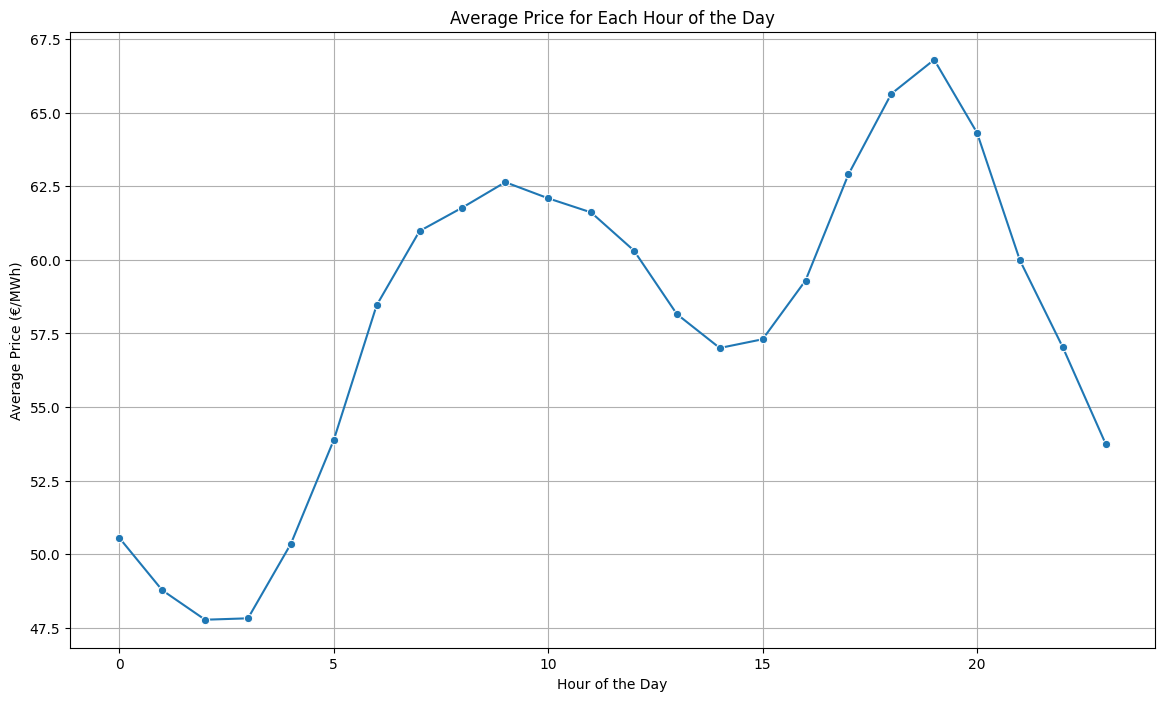

In [28]:
# average price for each hour of the day
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='price actual', data=hourly_price_avg, marker='o')
plt.title('Average Price for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (€/MWh)')
plt.grid(True)
plt.show()


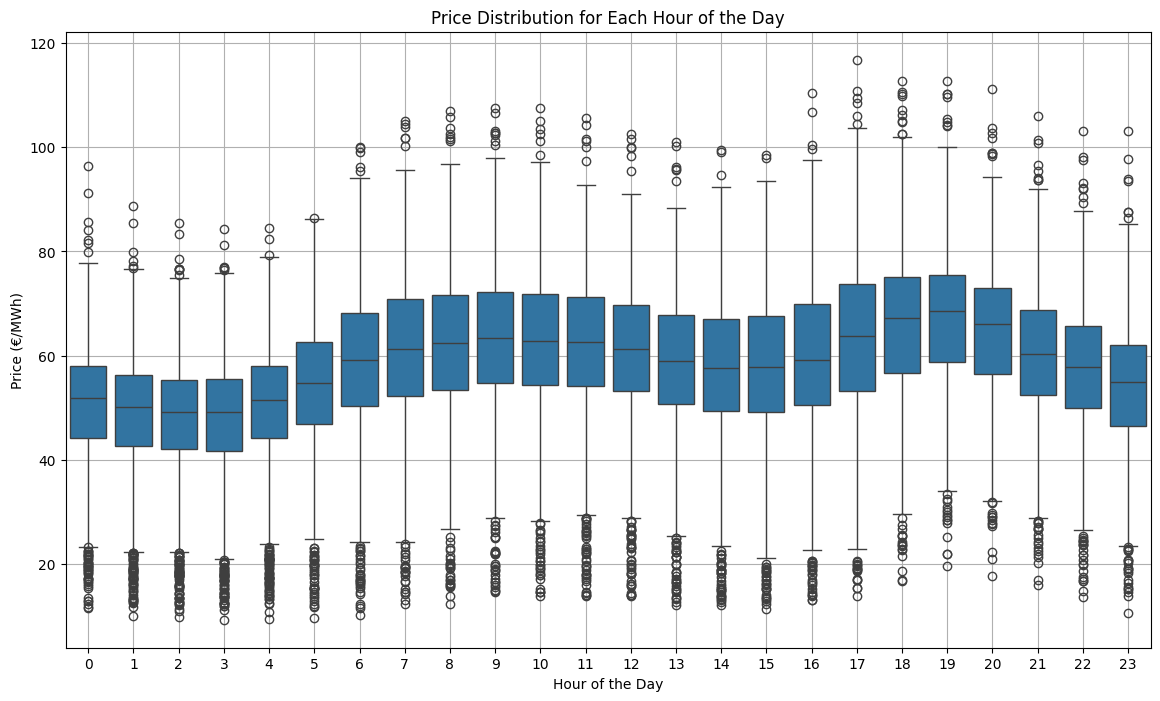

In [29]:
# distribution of prices for each hour
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour', y='price actual', data=data)
plt.title('Price Distribution for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Price (€/MWh)')
plt.grid(True)
plt.show()

### Price & Demand vs. time

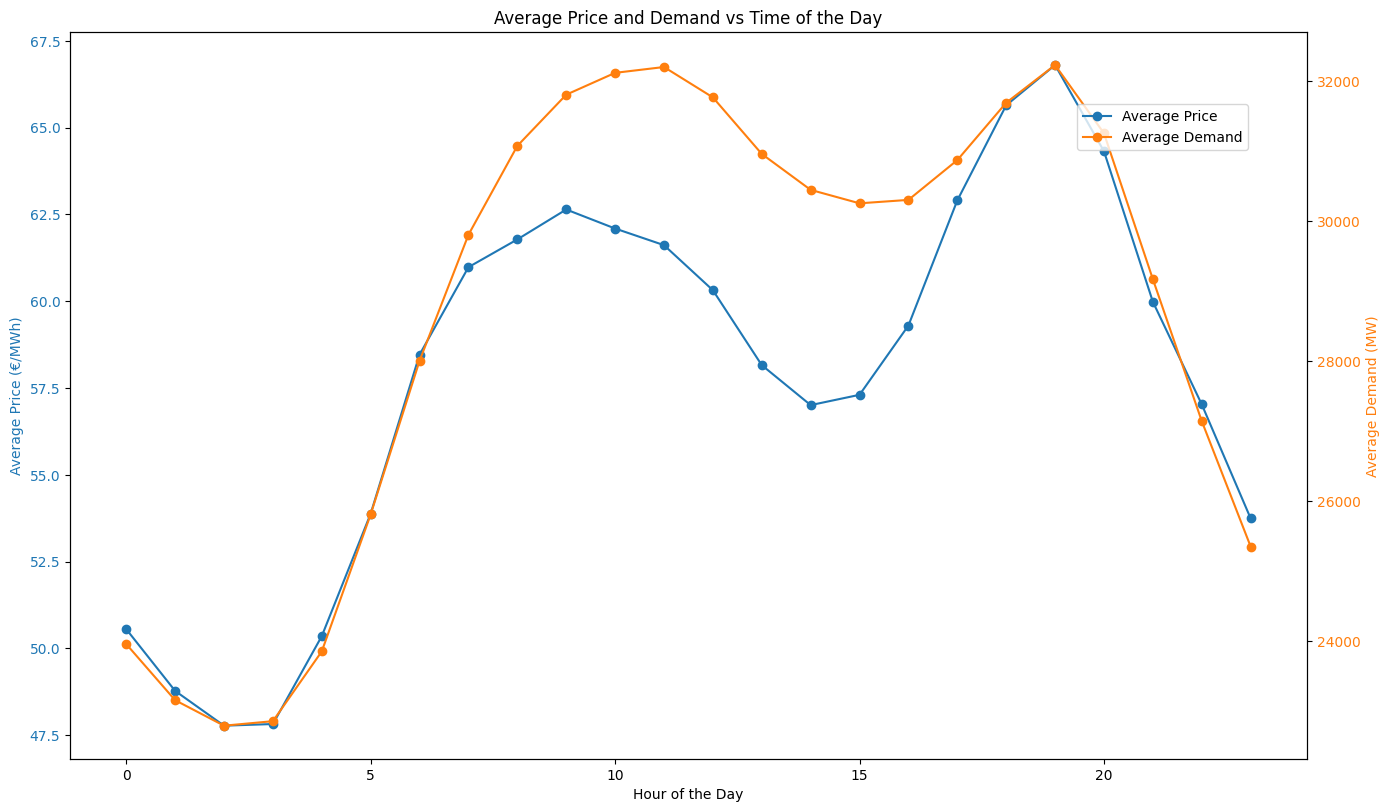

In [30]:
# average price and demand for each hour of the day
hourly_data = data.groupby('hour').agg({'price actual': 'mean', 'total load actual': 'mean'}).reset_index()


fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Average Price (€/MWh)', color=color)
ax1.plot(hourly_data['hour'], hourly_data['price actual'], color=color, marker='o', label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:orange'
ax2.set_ylabel('Average Demand (MW)', color=color) 
ax2.plot(hourly_data['hour'], hourly_data['total load actual'], color=color, marker='o', label='Average Demand')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Price and Demand vs Time of the Day')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.show()